# In this notebook:

We remove empty rows, only keep the latest document per unique person

# Import dataset

In [ ]:
import pandas as pd
stock_dataset_path = 'https://raw.githubusercontent.com/louispaulet/hatvp_viz/main/datasets/stocks/hatvp_cleaner_stocks.csv'
df = pd.read_csv(stock_dataset_path, index_col=0)
df

document_uuid    document_datetime owner_name  \
0    4344aaa1-874d-4e6d-9b1a-45f7725b710c  2022-07-11 15:40:13       ABAD   
1    4344aaa1-874d-4e6d-9b1a-45f7725b710c  2022-07-11 15:40:13       ABAD   
2    4344aaa1-874d-4e6d-9b1a-45f7725b710c  2022-07-11 15:40:13       ABAD   
3    4344aaa1-874d-4e6d-9b1a-45f7725b710c  2022-07-11 15:40:13       ABAD   
4    fa8d18ec-0db9-4a39-b1f4-caba0c31329b  2022-11-27 18:18:23       ABAD   
..                                    ...                  ...        ...   
102  19140875-1488-43e7-95a7-63d0b7212a19  2021-06-25 13:29:08      zuili   
103  19140875-1488-43e7-95a7-63d0b7212a19  2021-06-25 13:29:08      zuili   
104  19140875-1488-43e7-95a7-63d0b7212a19  2021-06-25 13:29:08      zuili   
105  19140875-1488-43e7-95a7-63d0b7212a19  2021-06-25 13:29:08      zuili   
106  d1129c22-a715-4df6-8c0f-cfc678f1518c  2022-08-20 08:26:16     Zulesi   

    owner_surname owner_birtdate                    owner_qualification  \
0          DAMIEN     05/04/1980                         Député/Ain(01)   
1          DAMIEN     05/04/1980                         Député/Ain(01)   
2          DAMIEN     05/04/1980                         Député/Ain(01)   
3          DAMIEN     05/04/1980                         Député/Ain(01)   
4          DAMIEN     05/04/1980                         Député/Ain(01)   
..            ...            ...                                    ...   
102       nicolas     08/03/1965  Maire ou adjoint municipal/Rouen (76)   
103       nicolas     08/03/1965  Maire ou adjoint municipal/Rouen (76)   
104       nicolas     08/03/1965  Maire ou adjoint municipal/Rouen (76)   
105       nicolas     08/03/1965  Maire ou adjoint municipal/Rouen (76)   
106     Jean-Marc     06/06/1988            Député/Bouches-du-Rhône(13)   

             company_name  position_value  shares_nb  
0                  ORANGE             877         83  
1      CREDIT AGRICOLE SA            2910        341  
2                  AIRBUS            1929         20  
3                 L'OREAL            6552         20  
4                  ORANGE             877         83  
..                    ...             ...        ...  
102           BNP PARIBAS           10820        200  
103               RENAULT            7073        200  
104          SAINT GOBAIN           11238        200  
105       UNIBAIL RODAMCO            7991        100  
106  DONNEES NON PUBLIEES               0          0  

[17068 rows x 9 columns]

# Condense the dataset by removing empty rows

In [ ]:
condensed_df = df[~df.company_name.str.contains("DONNEES NON PUBLIEES")]

# Filter dates

In [ ]:
condensed_df['document_datetime'] = pd.to_datetime(condensed_df['document_datetime'])

<ipython-input-83-e172a894d7f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_df['document_datetime'] = pd.to_datetime(condensed_df['document_datetime'])


In [ ]:
condensed_df.document_datetime

0     2022-07-11 15:40:13
1     2022-07-11 15:40:13
2     2022-07-11 15:40:13
3     2022-07-11 15:40:13
4     2022-11-27 18:18:23
              ...        
101   2021-06-25 13:29:08
102   2021-06-25 13:29:08
103   2021-06-25 13:29:08
104   2021-06-25 13:29:08
105   2021-06-25 13:29:08
Name: document_datetime, Length: 5974, dtype: datetime64[ns]

In [ ]:
condensed_df = condensed_df.sort_values('document_datetime', ascending=False)

id_list = condensed_df[["document_uuid", "document_datetime", "owner_name",	"owner_surname", "owner_birtdate"]].groupby(['owner_name', 'owner_surname', 'owner_birtdate']).first().reset_index()
id_list = list(id_list["document_uuid"])

In [ ]:
condensed_df[condensed_df['document_uuid'].isin(id_list)]

document_uuid   document_datetime owner_name  \
144  3496a04c-b003-4817-8c49-63ab224c2037 2023-03-06 16:53:48  pechenard   
142  3496a04c-b003-4817-8c49-63ab224c2037 2023-03-06 16:53:48  pechenard   
145  3496a04c-b003-4817-8c49-63ab224c2037 2023-03-06 16:53:48  pechenard   
146  3496a04c-b003-4817-8c49-63ab224c2037 2023-03-06 16:53:48  pechenard   
147  3496a04c-b003-4817-8c49-63ab224c2037 2023-03-06 16:53:48  pechenard   
..                                    ...                 ...        ...   
111  8f3de601-5851-4399-a759-feb8cfdc0ba7 2017-10-28 11:58:59     MASSON   
112  8f3de601-5851-4399-a759-feb8cfdc0ba7 2017-10-28 11:58:59     MASSON   
113  8f3de601-5851-4399-a759-feb8cfdc0ba7 2017-10-28 11:58:59     MASSON   
138  8f3de601-5851-4399-a759-feb8cfdc0ba7 2017-10-28 11:58:59     MASSON   
131  a6fb27a3-3d6b-4e51-921e-49486945de5d 2017-09-19 15:47:31    BOUZERA   

    owner_surname owner_birtdate  \
144      frederic     12/03/1957   
142      frederic     12/03/1957   
145      frederic     12/03/1957   
146      frederic     12/03/1957   
147      frederic     12/03/1957   
..            ...            ...   
111    jean-Louis     25/03/1947   
112    jean-Louis     25/03/1947   
113    jean-Louis     25/03/1947   
138    jean-Louis     25/03/1947   
131       Fouziya     02/06/1972   

                                   owner_qualification  \
144     Elu régional/Ile-de-France (11)/VICE PRESIDENT   
142     Elu régional/Ile-de-France (11)/VICE PRESIDENT   
145     Elu régional/Ile-de-France (11)/VICE PRESIDENT   
146     Elu régional/Ile-de-France (11)/VICE PRESIDENT   
147     Elu régional/Ile-de-France (11)/VICE PRESIDENT   
..                                                 ...   
111                               Sénateur/Moselle(57)   
112                               Sénateur/Moselle(57)   
113                               Sénateur/Moselle(57)   
138                               Sénateur/Moselle(57)   
131  Collectivité à statut particulier/Métropole de...   

                  company_name  position_value  shares_nb  
144                  DANONE SA           10156        213  
142  CASINO GUICHARD PERRACHON            1599        200  
145                ELIOR GROUP             939        500  
146                     ERAMET            5868         90  
147        ESSILORLUXOTTICA SA            7527         50  
..                         ...             ...        ...  
111                   ATOS 732            8563         66  
112              CARREFOUR 172            3792        228  
113                 DANONE 644            8688        132  
138                 SODEXO 220           12451        126  
131            SELARL BOUZERDA            8000       8000  

[3607 rows x 9 columns]

In [ ]:
condensed_df.to_csv("/content/drive/MyDrive/AI/HATVP/datasets/stocks/hatvp_condensed_stocks.csv")

# GPT4 export JSON

In [ ]:
condensed_df.sample(n=8).to_json(orient='records')

'[{"document_uuid":"e8e14c7b-b451-44e0-8781-df1f5ad2bacc","document_datetime":1600627123000,"owner_name":"juvin","owner_surname":"herve","owner_birtdate":"29\\/01\\/1956","owner_qualification":"D\\u00e9put\\u00e9 europ\\u00e9en","company_name":"ESIGROUP","position_value":9600,"shares_nb":300},{"document_uuid":"856297a2-83b1-49b5-8398-d9ef7b2a5699","document_datetime":1619946307000,"owner_name":"TCHOBDRENOVITCH","owner_surname":"ROBERT","owner_birtdate":"01\\/11\\/1957","owner_qualification":"Membre d\\u2019EPCI\\/Communaut\\u00e9 territoriale du sud Luberon","company_name":"BIOPHYTIS","position_value":1926,"shares_nb":3000},{"document_uuid":"add1d576-47e7-4fd6-bff9-f66854eeb6aa","document_datetime":1628776705000,"owner_name":"PELLICANO","owner_surname":"Fortun\\u00e9","owner_birtdate":"09\\/08\\/1955","owner_qualification":"Maire ou adjoint municipal\\/Brest (29)","company_name":"AIRBUS","position_value":4758,"shares_nb":53},{"document_uuid":"d8bf203d-5be2-464c-a812-722a458ca501","docu

# Visualisations

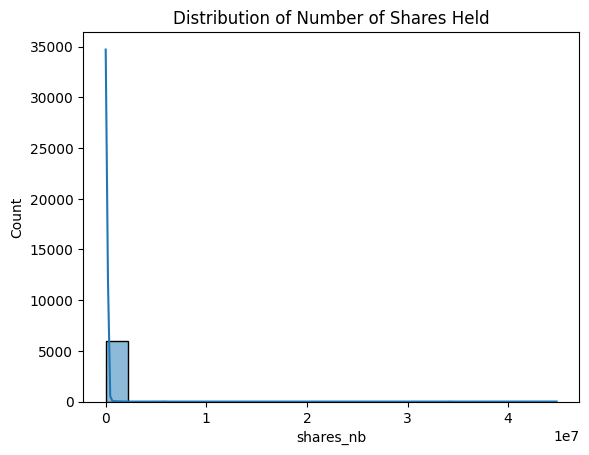

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.histplot(data=condensed_df, x="shares_nb", bins=20, kde=True)
plt.title("Distribution of Number of Shares Held")
plt.show()


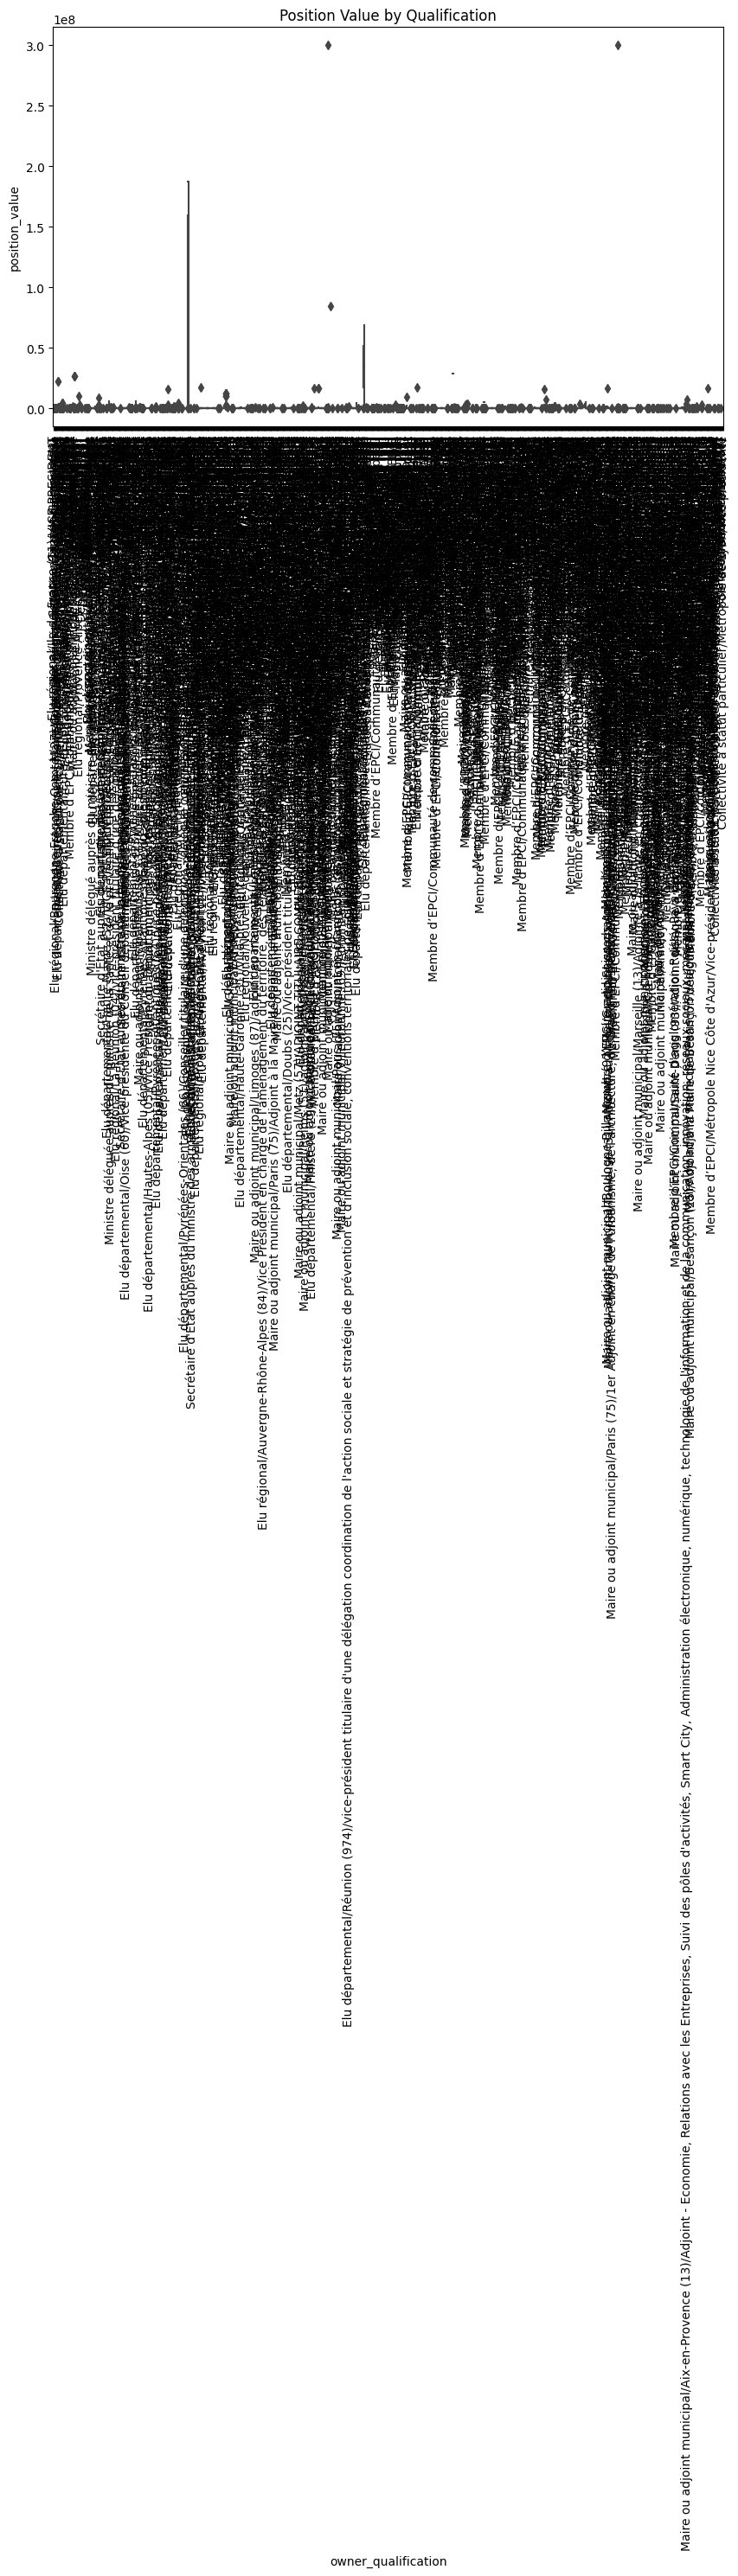

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=condensed_df, x="owner_qualification", y="position_value")
plt.title("Position Value by Qualification")
plt.xticks(rotation=90)
plt.show()


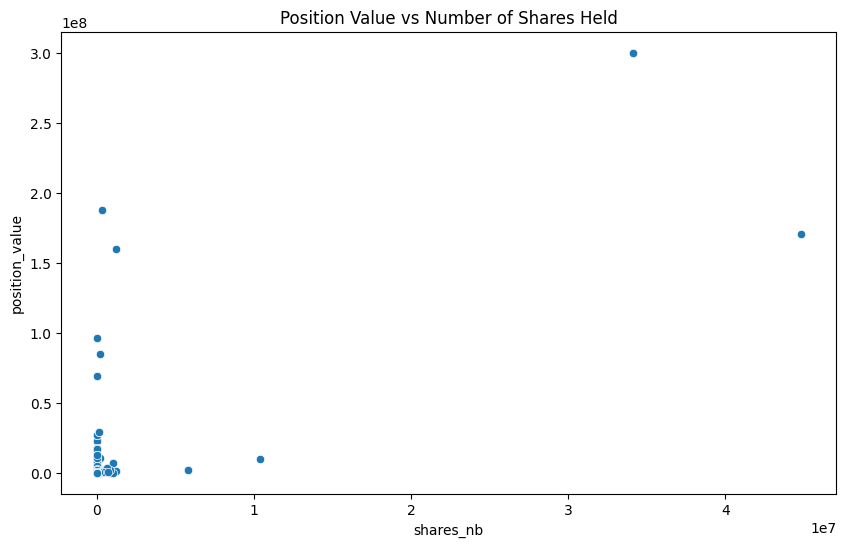

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=condensed_df, x="shares_nb", y="position_value")
plt.title("Position Value vs Number of Shares Held")
plt.show()

In [ ]:
df = condensed_df

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


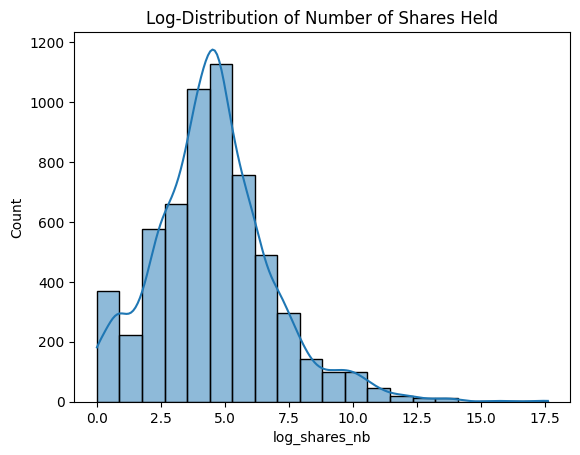

In [ ]:
import numpy as np

df['log_shares_nb'] = np.log(df['shares_nb'] + 1)
df['log_position_value'] = np.log(df['position_value'] + 1)

sns.histplot(data=df, x="log_shares_nb", bins=20, kde=True)
plt.title("Log-Distribution of Number of Shares Held")
plt.show()

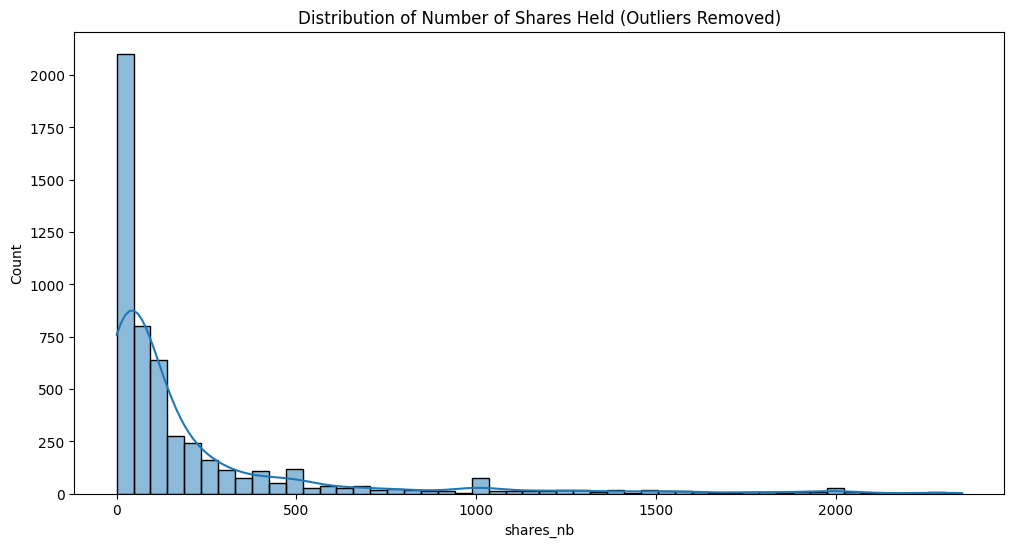

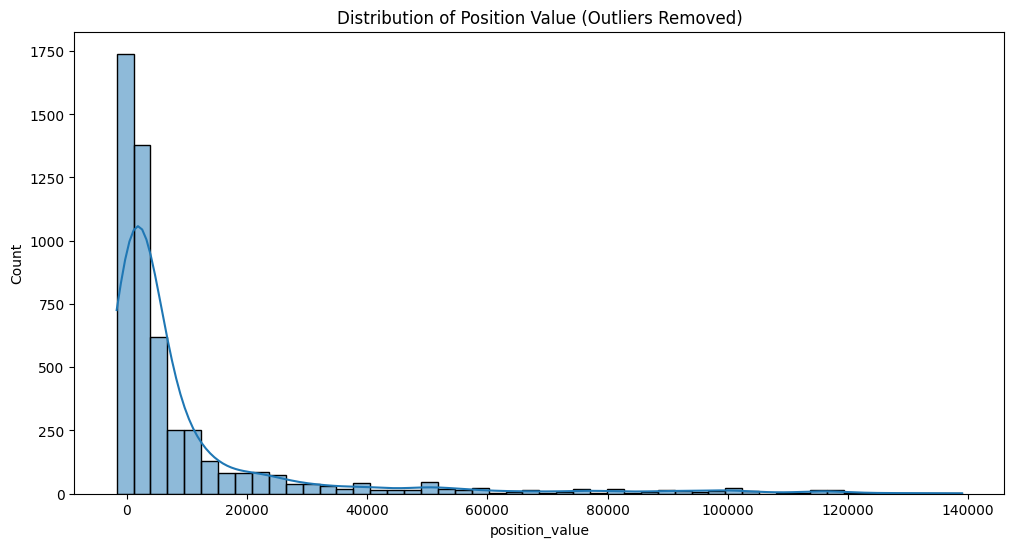

In [ ]:
# Define upper limit for outliers
upper_limit_shares = df['shares_nb'].quantile(.92)
upper_limit_value = df['position_value'].quantile(.92)

# Filter data
df_filtered = df[(df['shares_nb'] < upper_limit_shares) & (df['position_value'] < upper_limit_value)]


# Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x="shares_nb", bins=50, kde=True)
plt.title("Distribution of Number of Shares Held (Outliers Removed)")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x="position_value", bins=50, kde=True)
plt.title("Distribution of Position Value (Outliers Removed)")
plt.show()


In [ ]:
df['year'] = df['document_datetime'].dt.year

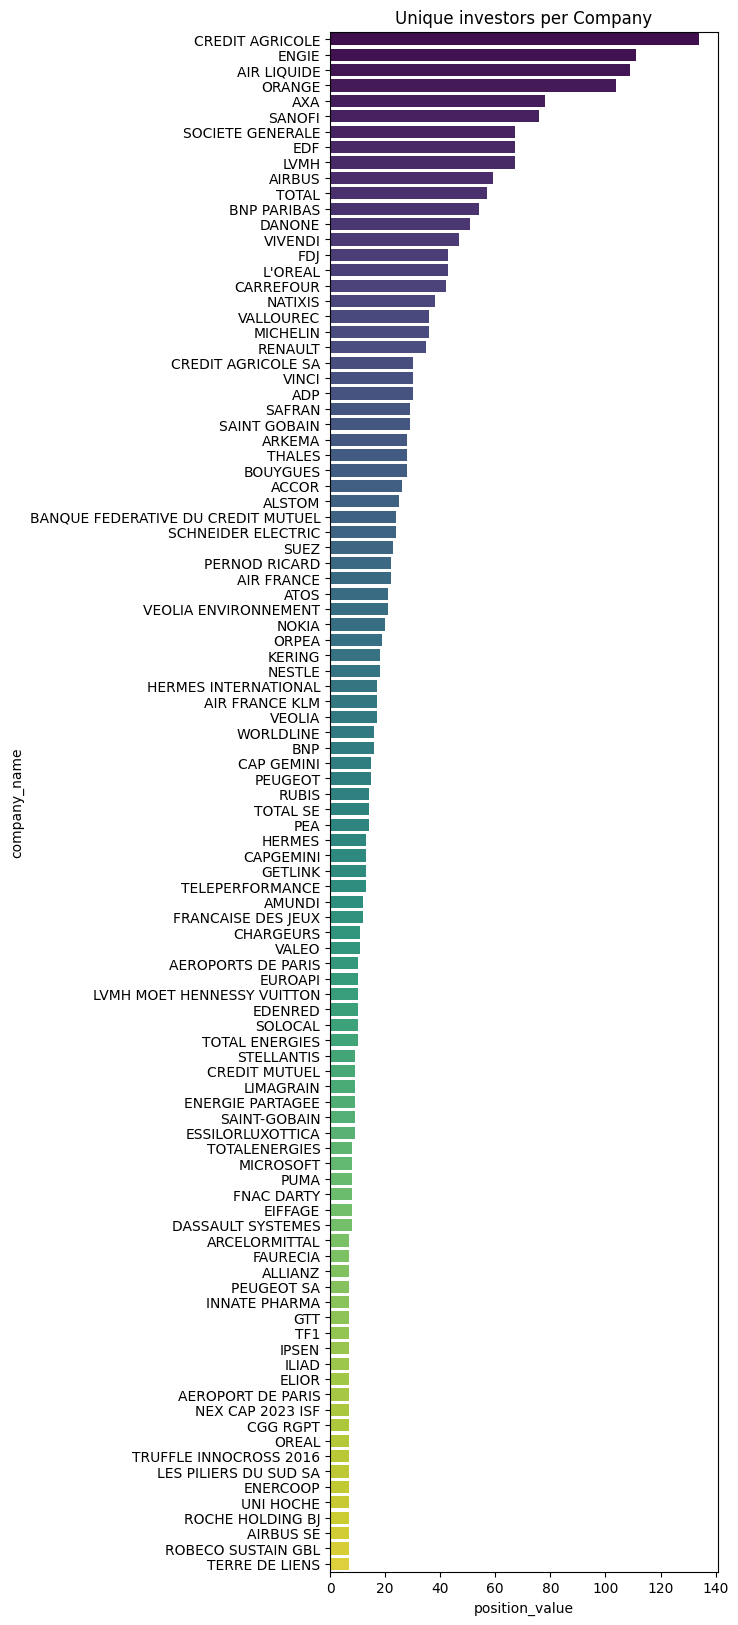

In [ ]:
# Group by company_name and sum the shares_nb
df_grouped = df.groupby('company_name')['position_value'].count().reset_index()

# Sort the values
df_grouped = df_grouped.sort_values('position_value', ascending=False).head(100)

# Create barplot
plt.figure(figsize=(5,20))
sns.barplot(data=df_grouped, x='position_value', y='company_name', palette='viridis')
plt.title("Unique investors per Company")
plt.show()

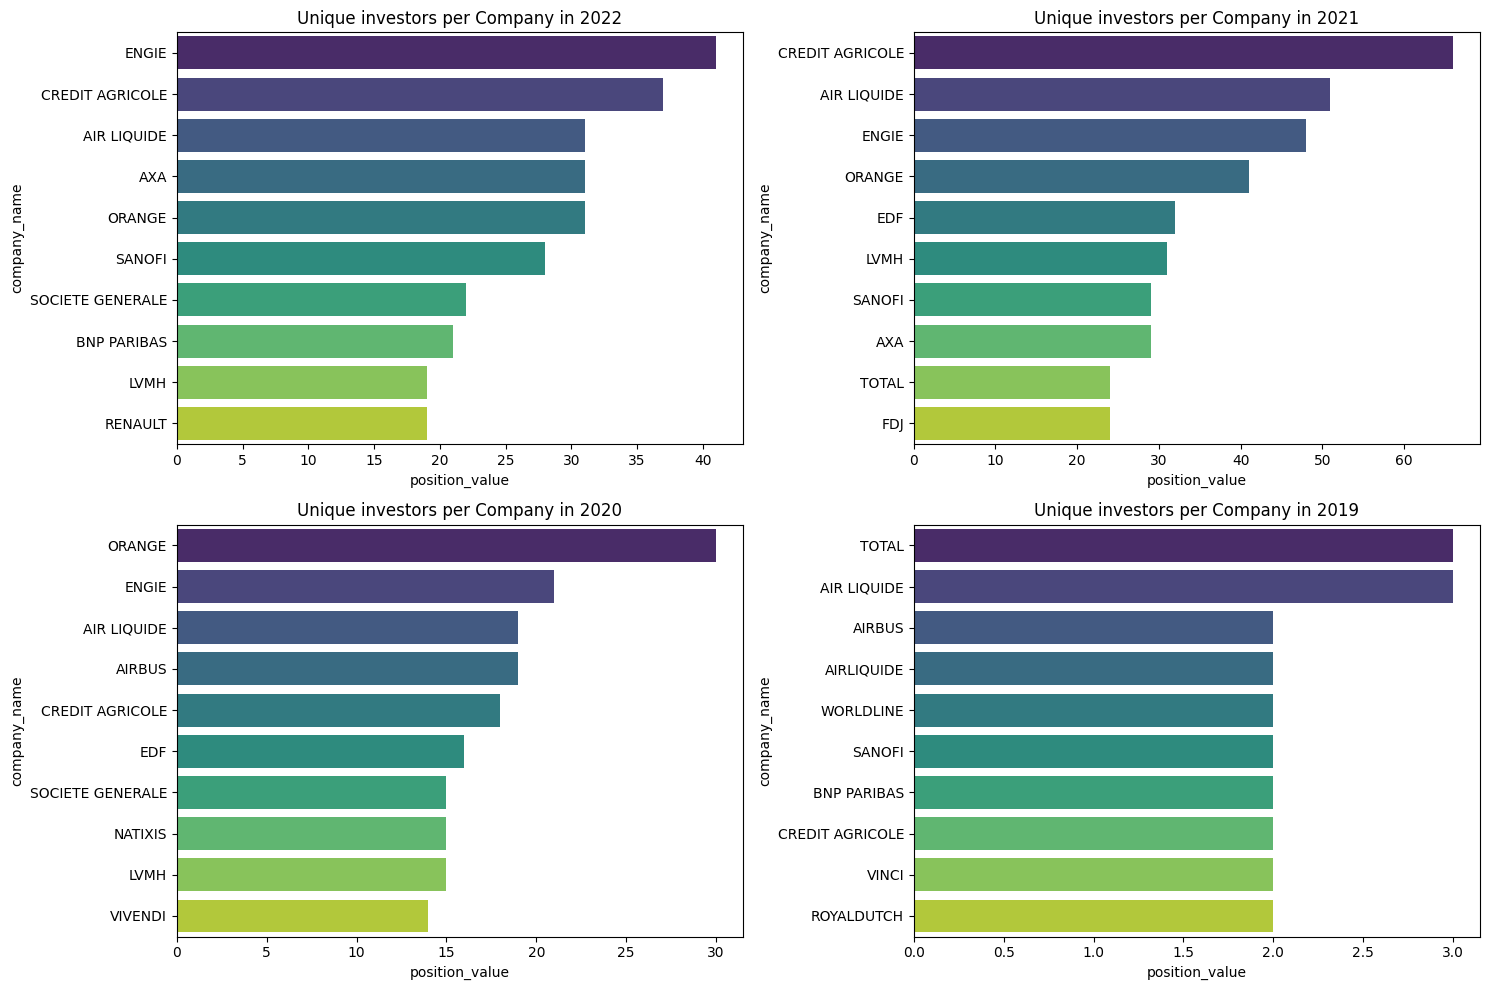

In [ ]:
# Create subplots for each year
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
years = [2022, 2021, 2020, 2019]

for i, ax in enumerate(axs.flatten()):
    year = years[i]
    df_year = df[df['year'] == year]

    # Group by company_name and sum the shares_nb
    df_grouped = df_year.groupby('company_name')['position_value'].count().reset_index()

    # Sort the values
    df_grouped = df_grouped.sort_values('position_value', ascending=False).head(10)


    # df_grouped_year = df_year.groupby('company_name')['shares_nb'].sum().reset_index()
    # df_grouped_year = df_grouped_year.sort_values('shares_nb', ascending=False)
    # sns.barplot(data=df_grouped_year, x='shares_nb', y='company_name', palette='viridis', ax=ax)
    sns.barplot(data=df_grouped, x='position_value', y='company_name', palette='viridis', ax=ax)

    ax.set_title(f"Unique investors per Company in {year}")

plt.tight_layout()
plt.show()

In [ ]:
companies_per_holder_count = df.groupby('company_name')['position_value'].count().reset_index()
companies_per_holder_count.columns = ['company_name', 'holder_count']
companies_per_holder_count

company_name  holder_count
0                              0             1
1                     123 SOLEIL             2
2           123 TRANSMISSION FIP             1
3             123PATRIMOINE 2012             1
4                           2ARH             1
...                          ...           ...
2013   ZELIS ACTIONS EUROPEENNES             1
2014  ZELIS ACTS EUROPEENNES FCP             1
2015                      ZODIAC             1
2016                      ZORTIS             2
2017                 ZZCORPORATE             1

[2018 rows x 2 columns]

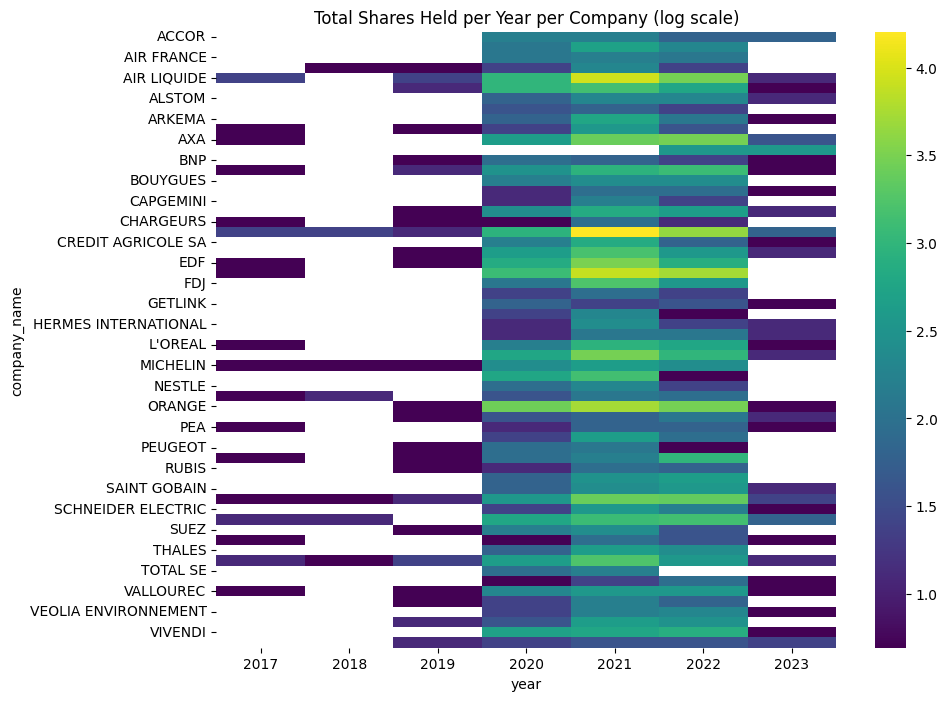

In [ ]:
# Pivot df to create a matrix where rows are companies, columns are years and values are sum of shares
popular_companies_list = list(companies_per_holder_count[companies_per_holder_count.holder_count > 10]['company_name'])
df_pivot = df[df.company_name.isin(popular_companies_list)]
df_pivot = df_pivot.pivot_table(index='company_name', columns='year', values='shares_nb', aggfunc='count')

# Use a logarithmic scale to handle skewness in the data
df_pivot = np.log1p(df_pivot)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_pivot, cmap='viridis')
plt.title('Total Shares Held per Year per Company (log scale)')
plt.show()


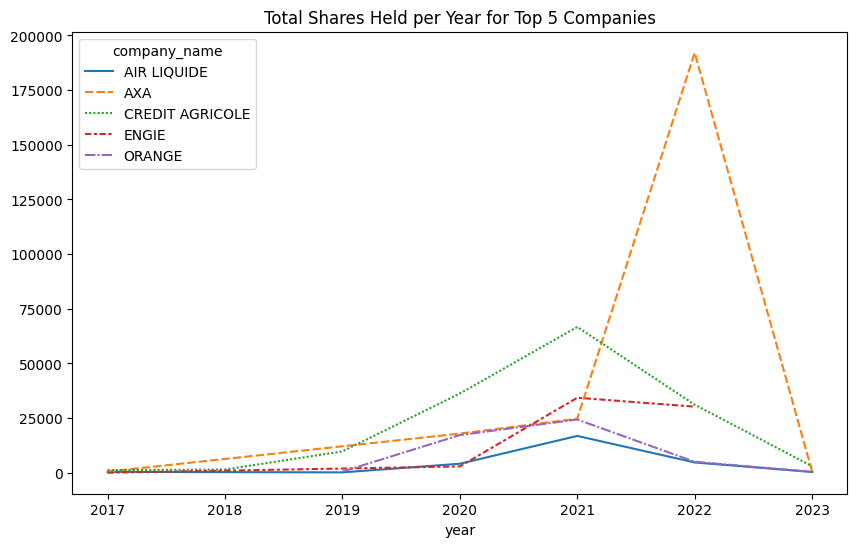

In [ ]:
# Select top N companies
top_N = df.groupby('company_name')['position_value'].count().nlargest(5).index

# Filter df for these companies
df_top_N = df[df['company_name'].isin(top_N)]

# Pivot df to create a matrix where rows are years, columns are companies and values are sum of shares
df_pivot = df_top_N.pivot_table(index='year', columns='company_name', values='shares_nb', aggfunc='sum')

# Plot lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_pivot)
plt.title('Total Shares Held per Year for Top 5 Companies')
plt.show()


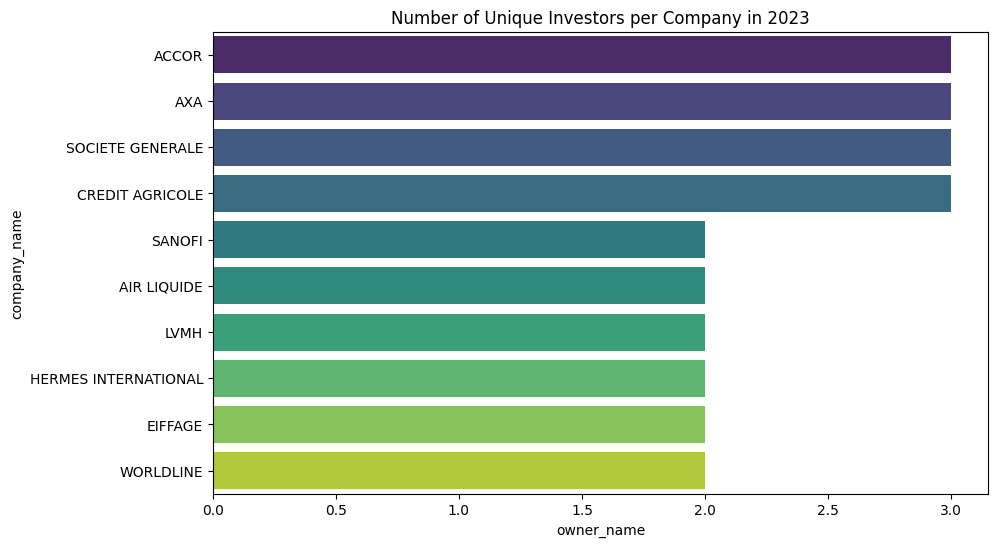

In [ ]:
# Get the most recent year in the dataset
latest_year = df['year'].max()

# Filter df for this year
df_latest = df[df['year'] == latest_year]

# Count unique investors per company
df_investors = df_latest.groupby('company_name')['owner_name'].nunique().reset_index()

# Sort values
df_investors = df_investors.sort_values('owner_name', ascending=False).head(10)

# Plot barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df_investors, x='owner_name', y='company_name', palette='viridis')
plt.title('Number of Unique Investors per Company in ' + str(latest_year))
plt.show()


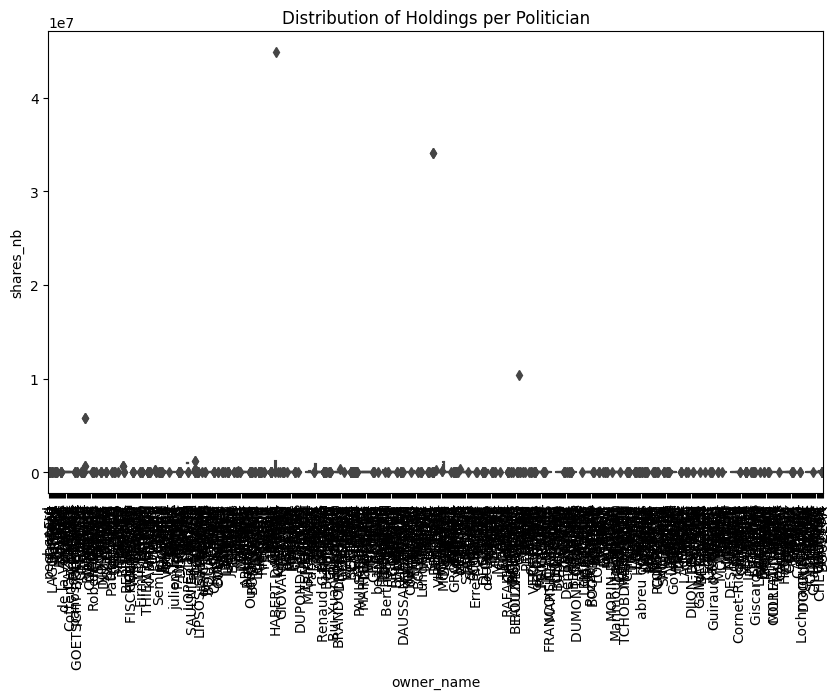

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='owner_name', y='shares_nb')
plt.xticks(rotation=90)
plt.title('Distribution of Holdings per Politician')
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


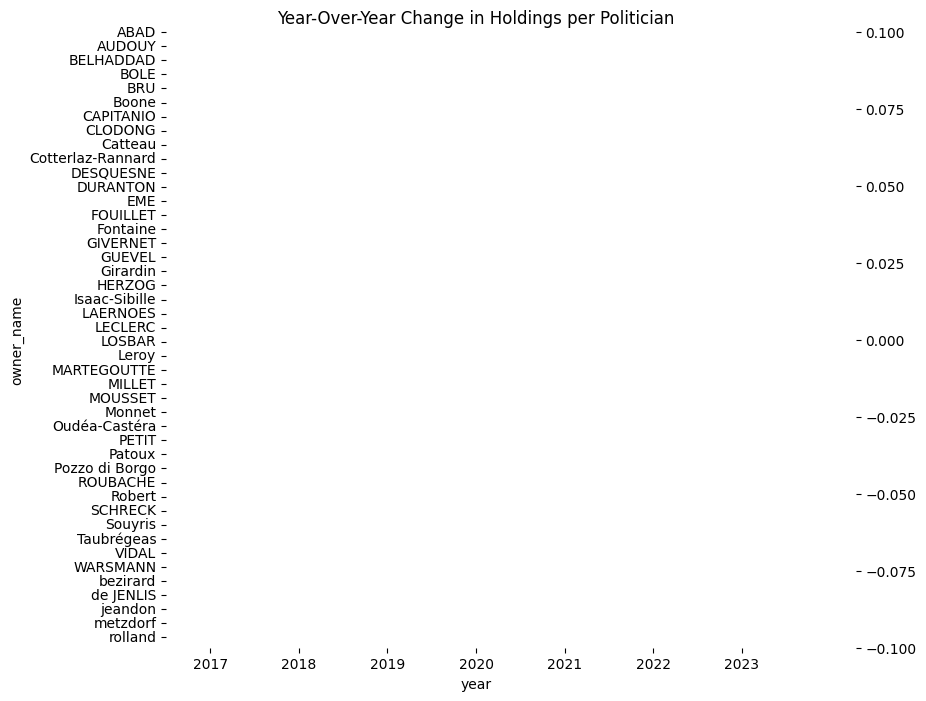

In [ ]:
# Create a pivot table with years as columns and politicians as rows
df_pivot = df.pivot_table(index='owner_name', columns='year', values='shares_nb', aggfunc='sum')

# Calculate the year over year percentage change
df_change = df_pivot.pct_change(axis='columns')

# Plot heatmap of changes
plt.figure(figsize=(10,8))
sns.heatmap(df_change, cmap='coolwarm', center=0)
plt.title('Year-Over-Year Change in Holdings per Politician')
plt.show()


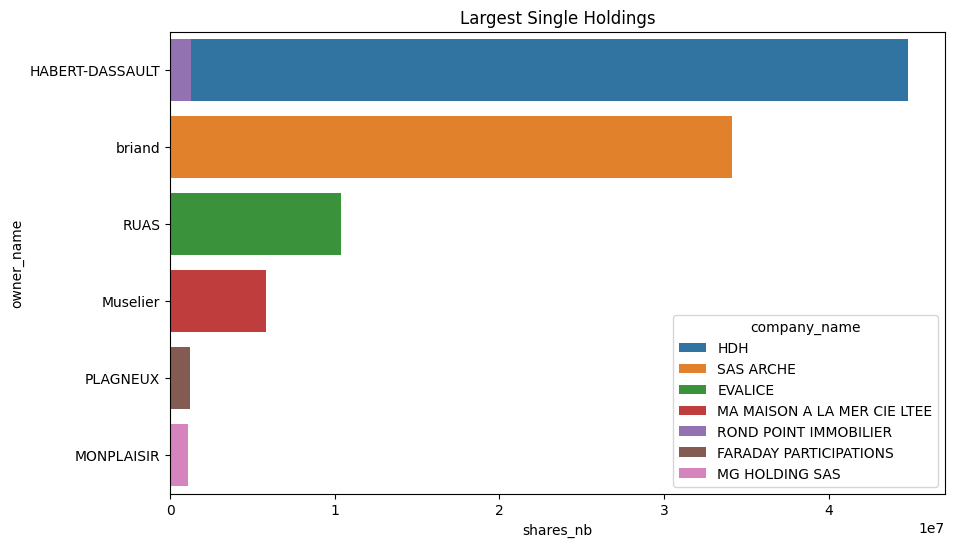

In [ ]:
# Find the largest single holdings
df_largest = df.nlargest(10, 'shares_nb')

# Plot the largest holdings
plt.figure(figsize=(10,6))
sns.barplot(data=df_largest, x='shares_nb', y='owner_name', hue='company_name', dodge=False)
plt.title('Largest Single Holdings')
plt.show()


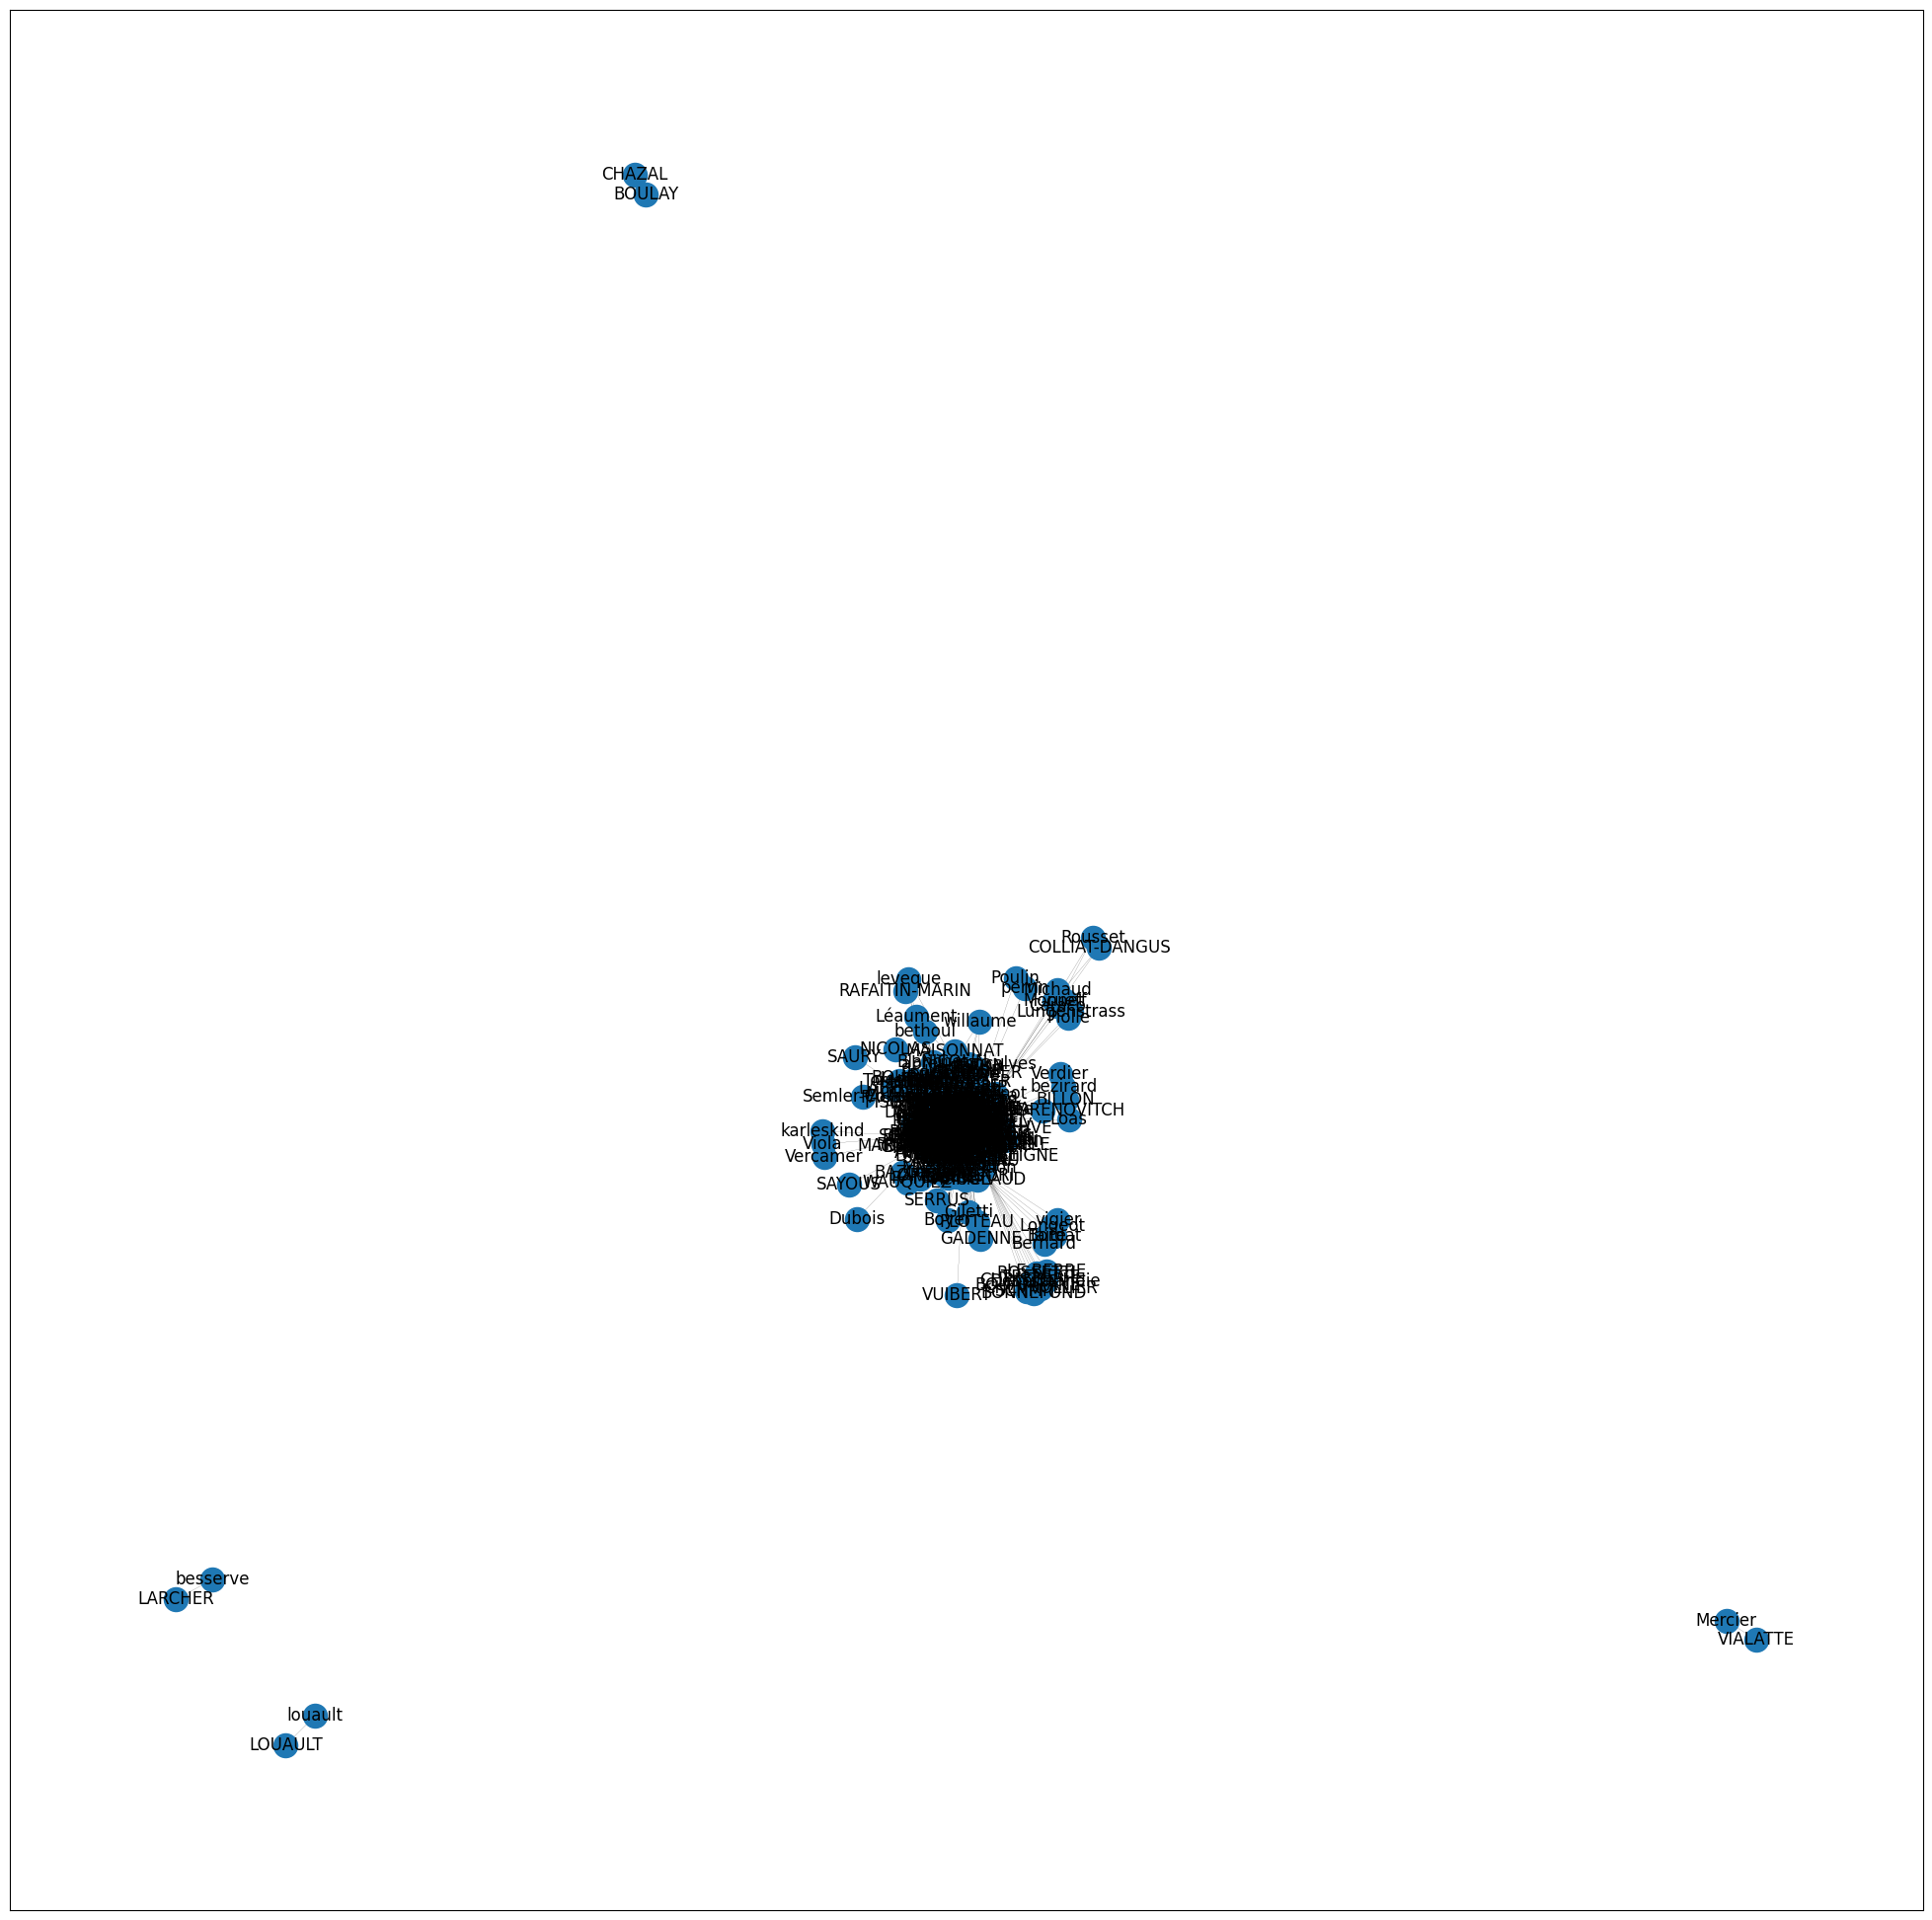

In [ ]:
import networkx as nx
from itertools import combinations

# Create an empty networkx graph
G = nx.Graph()

# For each company, find all pairs of politicians that have invested in the company
for company in df['company_name'].unique():
    investors = df[df['company_name'] == company]['owner_name'].unique()
    investor_pairs = combinations(investors, 2)
    
    for pair in investor_pairs:
        if G.has_edge(*pair):
            # If the pair of politicians have already invested in another company together, increase weight of edge
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            # If this is the first company they're both invested in, create a new edge with weight 1
            G.add_edge(pair[0], pair[1], weight=1)

# Now we can create a network visualization. We'll use the 'spring' layout to nicely distribute the nodes.
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G, seed=7)  # for reproducible node positions
weights = nx.get_edge_attributes(G, 'weight')

# Draw nodes
nx.draw_networkx_nodes(G, pos)

# Draw edges, with width proportional to the weight
nx.draw_networkx_edges(G, pos, width=[v / 10 for v in weights.values()])

# Draw node labels
nx.draw_networkx_labels(G, pos)

plt.show()


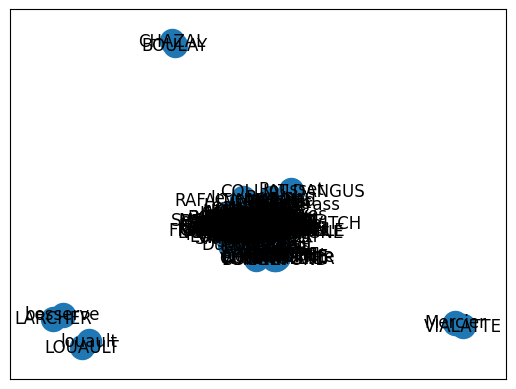

In [ ]:
import plotly.graph_objects as go
import networkx as nx

G = nx.Graph()

# For each company, find all pairs of politicians that have invested in the company
for company in df['company_name'].unique():
    investors = df[df['company_name'] == company]['owner_name'].unique()
    investor_pairs = combinations(investors, 2)
    
    for pair in investor_pairs:
        if G.has_edge(*pair):
            # If the pair of politicians have already invested in another company together, increase weight of edge
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            # If this is the first company they're both invested in, create a new edge with weight 1
            G.add_edge(pair[0], pair[1], weight=1)

# Now we can create a network visualization. We'll use the 'spring' layout to nicely distribute the nodes.
# plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=7)  # for reproducible node positions
weights = nx.get_edge_attributes(G, 'weight')

# Draw nodes
nx.draw_networkx_nodes(G, pos)

# Draw edges, with width proportional to the weight
nx.draw_networkx_edges(G, pos, width=[v / 10 for v in weights.values()])

# Draw node labels
nx.draw_networkx_labels(G, pos)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(node) + ':<br># of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://www.github.com/'> GitHub</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

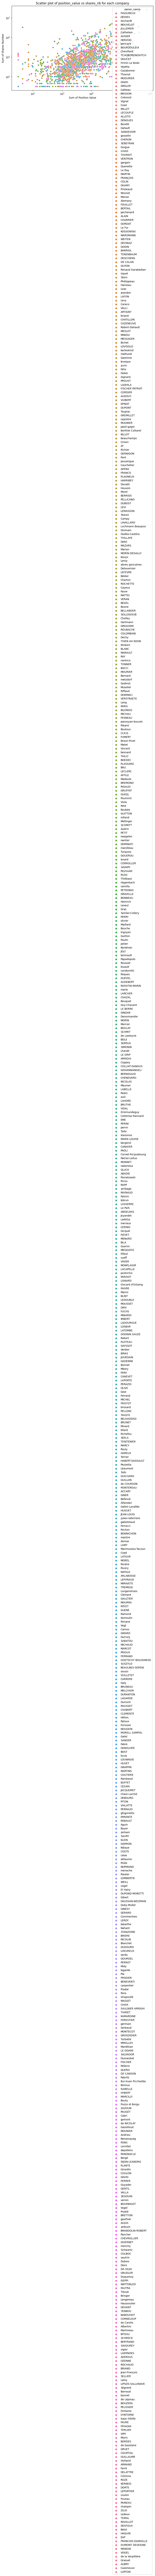

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by company_name
df_grouped = df.groupby('company_name').agg({'position_value': 'sum', 'shares_nb': 'sum', 'owner_name': 'first'}).reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_grouped, x='position_value', y='shares_nb', hue='owner_name')
scatter.set(xscale="log", yscale="log")

# Display the plot
plt.title('Scatter plot of position_value vs shares_nb for each company')
plt.xlabel('Sum of Position Value')
plt.ylabel('Sum of Shares Number')
plt.show()


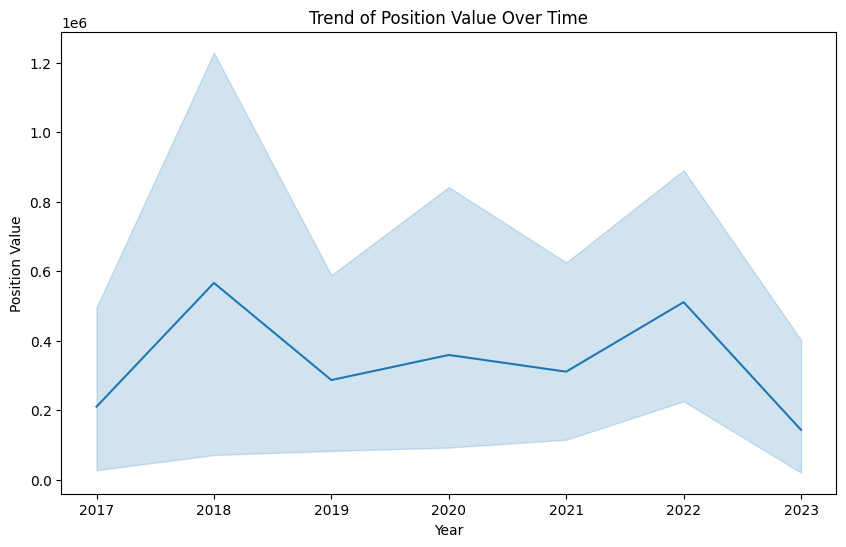

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'document_datetime' to datetime and extract the year
df['year'] = pd.to_datetime(df['document_datetime'], unit='ms').dt.year

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='position_value')
plt.title('Trend of Position Value Over Time')
plt.xlabel('Year')
plt.ylabel('Position Value')
plt.show()


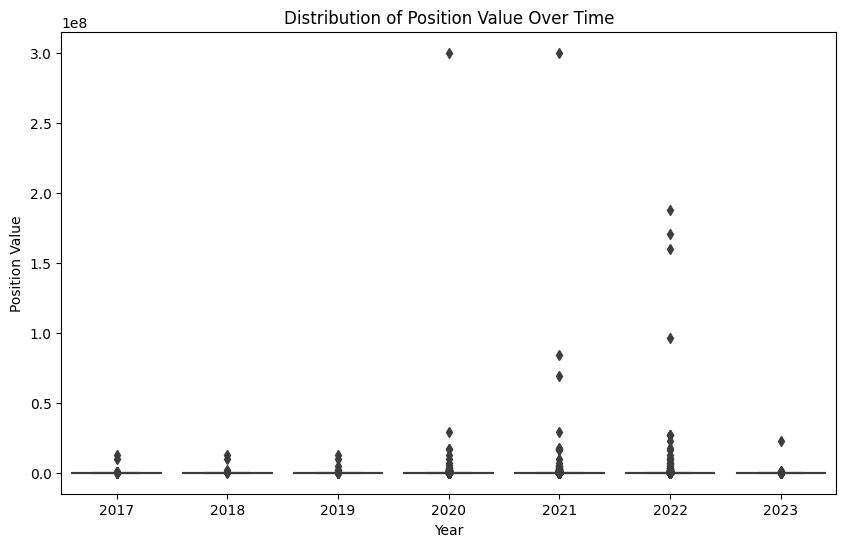

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='position_value')
plt.title('Distribution of Position Value Over Time')
plt.xlabel('Year')
plt.ylabel('Position Value')
plt.show()


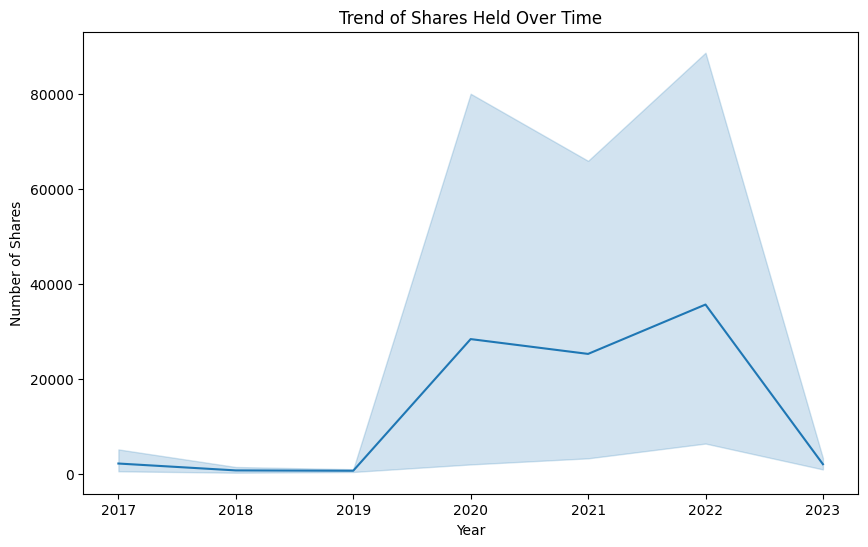

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='shares_nb')
plt.title('Trend of Shares Held Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shares')
plt.show()


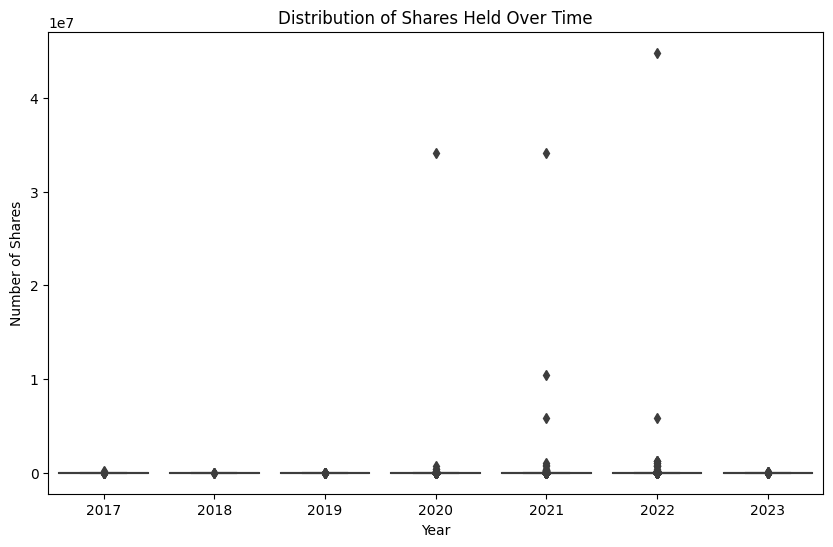

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='shares_nb')
plt.title('Distribution of Shares Held Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shares')
plt.show()
